In [2]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt

# Define a function takes in 2 numpy arrays and calculates the distance between the two
# d = \sqrt{(x_2 - x_1)^2 + (y_2-y_1)^2} for 2 variables

def distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))


In [14]:
# Test the distance function

distance(np.array([2,2,2,2]), np.array([3,3,3,3]))

2.0

In [54]:
# Make KNN object to set parameters, fit onto training data and make predictions
class KNN:
    def __init__(self, k=5):
        # Default values is 5, set to whatever is input when initializing
        self.k = k

    def fit(self, X, y):
        # Accept an X and a y
        # X should be nxn with n observations and n predictors
        # y should be nx1 with n observations and 1 set of outcomes
        self.X_train = X
        self.y_train = y
        self.n_features = X.shape[1]

    def predictOne(self, x):
        # Calculate distances between x and all training data
        distances = list(map(lambda x_train: distance(x, x_train), self.X_train))

        # Get the k nearest neighbors and their y values
        k_indexes = np.argsort(distances)[:self.k]
        k_nearest_y = list(map(lambda i: self.y_train[i], k_indexes))

        # Return the most common y value of the  the k nearest neighbors
        most_common = np.argmax(np.bincount(k_nearest_y))
        return most_common

    def predict(self, X):
        
        # Check to make sure that the number of features in predict X matches
        # the fit data
        if X.shape[1] != self.n_features:
          raise ValueError("Number of features in X does not match training data")

        # Map our predictOne function to each set of predictors to get all our
        # predictions
        # then return the prediction as an output
        y_pred = list(map(lambda x: self.predictOne(x), X))
        return np.array(y_pred)
      
    def plot(self, resolution=0.5):
        # Get the minimum and maximum values
        x_min, x_max = self.X_train[:, 0].min() - 1, self.X_train[:, 0].max() + 1
        y_min, y_max = self.X_train[:, 1].min() - 1, self.X_train[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution), np.arange(y_min, y_max, resolution))

        # Predict the class labels for each point on the mesh
        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Make the plot
        plt.contourf(xx, yy, Z, alpha=0.4)
        plt.scatter(self.X_train[:, 0], self.X_train[:, 1], c=self.y_train, alpha=0.8)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title(f'KNN Decision Surface (k={self.k})')
        plt.show()



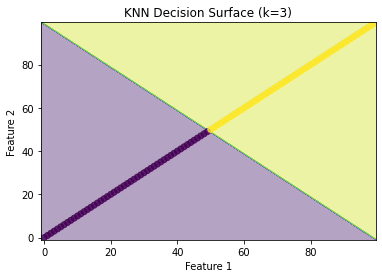

In [55]:
# Test out the function

X = np.vstack((np.arange(0, 100, 1, dtype=int), np.arange(0, 100, 1, dtype=int))).T
y = np.concatenate((np.zeros(100//2), np.ones(100//2)))

knn = KNN(3)

knn.fit(X,y)

knn.predict(np.array([[2,1],[99,86]]))

knn.plot()